A lot of people are protesting and marching together after George Floyd’s murder by the police force. And some people are demanding reform and defunding of the police force. So, this is one of the growing concerns of the country, and people are dividing in favor of him and against him. I am not either side of them, and I will work as a neutral person. I plan to find truth implementing machine learning algorithms based on the available data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, average_precision_score, make_scorer


C:\Users\pritam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading data source
df=pd.read_csv(r"C:\Users\pritam\Desktop\Police_killings_US.csv", engine="python")
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
# checking the shape of the data
df.shape

(2535, 14)

In [4]:
# checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
# checking null values of the dataframe
df.isnull().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [6]:
# Yes, we found some null value so we need to handle it correctly.
df.fillna(0,inplace=True)

In [7]:
df.head(40)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2/1/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2/1/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,3/1/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,4/1/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,4/1/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,4/1/2015,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,5/1/2015,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,6/1/2015,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,6/1/2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,6/1/2015,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [8]:
# checking null again
df.isnull().any().sum()

0

In [9]:
# now i have most of the datasets are in catagorial form so need to convert into numerical form.
# mostly i will be work on the manner_of death, armed and race data so lets convert it.
df['manner_of_death']=pd.factorize(df['manner_of_death'])[0]

In [10]:
df['manner_of_death'].value_counts()

0    2363
1     172
Name: manner_of_death, dtype: int64

In [11]:
# lets change the race of the person
df['racewise_death']=pd.factorize(df['race'])[0]

In [12]:
df['racewise_death'].value_counts()

1    1201
3     618
2     423
5     195
0      39
6      31
4      28
Name: racewise_death, dtype: int64

In [13]:
# let's change the gender too
df['gender']=pd.factorize(df['gender'])[0]

In [14]:
df['gender'].value_counts()

0    2428
1     107
Name: gender, dtype: int64

In [15]:
# changing armed dato into numerical format
df['armed_']=pd.factorize(df['armed'])[0]

In [16]:
# converting mental illness into nunerical data
df['mental_illness']=pd.factorize(df['signs_of_mental_illness'])[0]

In [17]:
df1=df.drop(columns=['id','name','armed','race','city','state','signs_of_mental_illness','threat_level','threat_level','flee','body_camera'])

In [18]:
# created new dataframe to work on it.
# Final datasets 
df1.head(10)

,date,manner_of_death,age,gender,racewise_death,armed_,mental_illness
0,2/1/2015,0,53.0,0,0,0,0
1,2/1/2015,0,47.0,0,1,0,1
2,3/1/2015,1,23.0,0,2,1,1
3,4/1/2015,0,32.0,0,1,2,0
4,4/1/2015,0,39.0,0,2,3,1
5,4/1/2015,0,18.0,0,1,0,1
6,5/1/2015,0,22.0,0,2,0,1
7,6/1/2015,0,35.0,0,1,0,1
8,6/1/2015,0,34.0,1,1,1,1
9,6/1/2015,0,47.0,0,3,2,1


In [19]:
# checking null values
df1.isnull().any().sum()

0

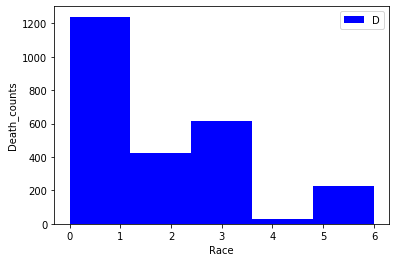

In [20]:
plt.hist(df1['racewise_death'],bins=5,color="blue")
plt.xlabel("Race")
plt.ylabel("Death_counts")

plt.legend("Death_counts")
plt.show()

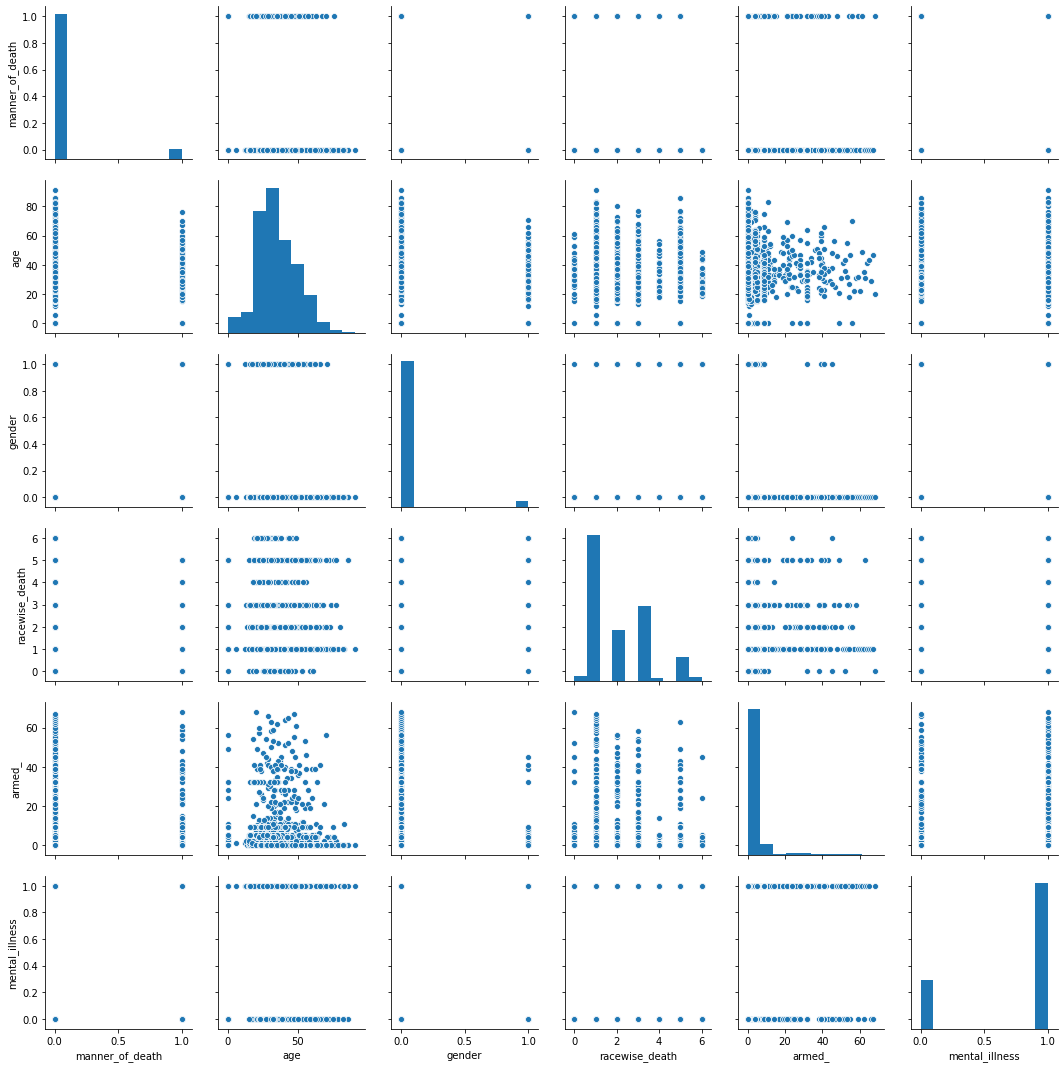

In [21]:
# pairplot to analyze the data structure
sns.pairplot(df1)

In [22]:
# From above plot, it concludes that it is classification problem and i have to use classification algorithms to handle it.

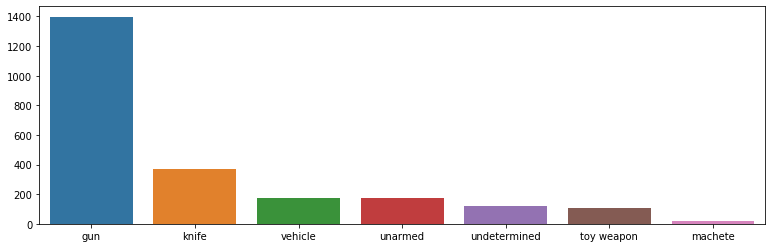

In [23]:
# i was kind of curious about the city,crime and other values so plotted.
# plotting killed data based on armed
armed=df.armed.value_counts()
plt.figure(figsize=(13,4))
sns.barplot(x=armed[:7].index,y=armed[:7].values)

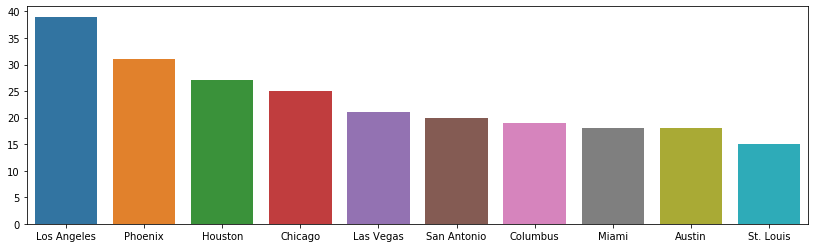

In [24]:
# top 10 most dangerous city
most_dangerous_city=df['city'].value_counts()
plt.figure(figsize=(14,4))
sns.barplot(x=most_dangerous_city[:10].index,y=most_dangerous_city[:10].values)
plt.show()

In [25]:
df1['date']

0       2/1/2015
1       2/1/2015
2       3/1/2015
3       4/1/2015
4       4/1/2015
          ...   
2530    28/07/17
2531    28/07/17
2532    29/07/17
2533    31/07/17
2534    31/07/17
Name: date, Length: 2535, dtype: object

In [26]:
df1['date']=pd.to_datetime(df1['date'])

In [27]:
df1.set_index('date',inplace=True)

In [28]:
# filtering the data which shows black and white death
df2=df1[(df1['racewise_death']==1) |(df1['racewise_death']==3)]
df2

,manner_of_death,age,gender,racewise_death,armed_,mental_illness
date,,,,,,
2015-02-01,0,47.0,0,1,0,1
2015-04-01,0,32.0,0,1,2,0
2015-04-01,0,18.0,0,1,0,1
2015-06-01,0,35.0,0,1,0,1
2015-06-01,0,34.0,1,1,1,1
...,...,...,...,...,...,...
2017-07-25,0,16.0,0,3,9,1
2017-07-26,0,25.0,0,3,5,1
2017-07-27,0,39.0,0,3,0,1


In [29]:
# creating data for input and target
feature_columns = ['manner_of_death','age','gender','armed_','mental_illness']
X=df2.drop(['racewise_death'],axis=1)
X
feature_columns

['manner_of_death', 'age', 'gender', 'armed_', 'mental_illness']

In [30]:
Y=df2['racewise_death']
Y

date
2015-02-01    1
2015-04-01    1
2015-04-01    1
2015-06-01    1
2015-06-01    1
             ..
2017-07-25    3
2017-07-26    3
2017-07-27    3
2017-07-31    3
2017-07-31    3
Name: racewise_death, Length: 1819, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
# Yes we have splitted the data successfully

In [32]:
#create a pipeline
pipe=Pipeline([('classifier',RandomForestClassifier())])

In [33]:
# creating dictionary for hyperparameter tuning
grid_param=[
            {'classifier':[LogisticRegression()],
             'classifier__penalty':['l2','l1'],
             'classifier__C':np.logspace(0,4,10)
    
            },
            {'classifier':[RandomForestClassifier()],
             'classifier__n_estimators':[10,100,1000],
             'classifier__max_depth':[5,8,15,25,30,None],
             'classifier__min_samples_leaf':[1,2,5,10,15,100],
             'classifier__max_leaf_nodes':[2,5,10]
             
             
    
            }]

In [43]:
# creating gridsearch of the pipeline to fit the best model
gridsearch=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1)
best_model=gridsearch.fit(X_train,Y_train)

In [35]:
best_model.cv_results_

{'mean_fit_time': array([0.01080704, 0.01160798, 0.01000729, 0.00970731, 0.00790591,
        0.00850558, 0.00810552, 0.00840592, 0.00770473, 0.00880637,
        0.01060762, 0.00870562, 0.01471052, 0.01561079, 0.00740438,
        0.00860605, 0.00760565, 0.00840554, 0.01220851, 0.00960612,
        0.02471805, 0.19694018, 1.8048604 , 0.02902117, 0.18951025,
        1.81969519, 0.02131548, 0.18951077, 1.84438863, 0.02281642,
        0.17232256, 1.84991655, 0.02111492, 0.185432  , 1.86292572,
        0.02401738, 0.17942767, 1.62535682, 0.02181554, 0.1986412 ,
        1.86672869, 0.02191548, 0.17962799, 1.89094615, 0.02111473,
        0.17742596, 1.78847327, 0.02131505, 0.17712636, 1.71682186,
        0.02251592, 0.20404506, 1.79157524, 0.02361698, 0.2008431 ,
        1.69080338, 0.02231555, 0.18302989, 1.84071012, 0.02251582,
        0.18022842, 1.83820839, 0.0240169 , 0.19473829, 1.74844422,
        0.02421703, 0.19053593, 1.76095347, 0.02361679, 0.17802711,
        1.85832281, 0.02211552,

In [45]:
# checking best score and best_params
best_model.best_score_,best_model.best_params_

(0.7109190887666929,
 {'classifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=25, max_features='auto', max_leaf_nodes=10,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=15, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  'classifier__max_depth': 25,
  'classifier__max_leaf_nodes': 10,
  'classifier__min_samples_leaf': 15,
  'classifier__n_estimators': 10})

In [46]:
# best_estimator
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=25,
                                        max_features='auto', max_leaf_nodes=10,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=15,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [47]:
# prediction
y_pred=best_model.predict_proba(X_test)[:,1]
y

In [48]:
# average precision_score
average_precision_score(Y_test, y_pred)

0.5371401873660531

In [49]:
log_loss(Y_test, y_pred)

0.5871374844376783

In [50]:
# i have high log_loss, i will find the cause of the result.

In [51]:
# Finally i have classified the death of the person based on the model but still struggeling to find whether death is biased 
# or not based on race? which parameter is responsible to answer the question? 
# please comment accordingly.I really need help. If i see only on the dataset, more whites have been killed than black so 
# there is no bias. But i think, this is not the right way to answer the probelm.
